In [155]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statannot
import pandas as pd

In [2]:
def load_var_from_mat(mat_file_name, varname):
    try:
        data = loadmat(mat_file_name)
        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')
        var = data[varname][()]
    return var

In [3]:
pth_mat_kidney = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_super_good_version\kidney_files\kidney_table.mat'
data_raw_kidney = load_var_from_mat(pth_mat_kidney, 'kidney_table')

pth_mat_liver = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_super_good_version\liver_old_vol\liver_table.mat'
data_raw_liver = load_var_from_mat(pth_mat_liver, 'liver_table')

In [5]:
colnames = ['reg_centroid_x',
'reg_centroid_y',
'Centroid_x',
'Centroid_y',
'Area',
'Perimeter',
'Circularity',
'Aspect Ratio',
'compactness',
'eccentricity',
'extent',
'form_factor',
'maximum_radius',
'mean_radius',
'median_radius',
'minor_axis_length',
'major_axis_length',
'orientation_degrees',
'r_mean_intensity_norm',
'g_mean_intensity_norm',
'b_mean_intensity_norm',
'slide_num',
'class']

In [20]:
df_kidney = pd.DataFrame(data_raw_kidney, columns=colnames)
df_kidney.drop('class', axis=1, inplace=True)
df_kidney['class'] = [1 for _ in range(len(df_kidney))]

In [22]:
df_liver = pd.DataFrame(np.transpose(data_raw_liver), columns=colnames[:-1])
df_liver['class'] = [2 for _ in range(len(df_liver))]

In [23]:
df_kidney.head()

,reg_centroid_x,reg_centroid_y,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,...,mean_radius,median_radius,minor_axis_length,major_axis_length,orientation_degrees,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm,slide_num,class
0,3256.936523,890.083008,30234.0,10916.0,222.666565,55.239559,0.916990,1.506422,13.703938,0.747888,...,8.329117,8.301506,13.838544,20.846684,5316.177734,0.367094,-0.426107,0.085461,411.0,1
1,3260.030029,885.132324,30260.0,10874.0,146.660278,48.798027,0.773959,1.911491,16.236485,0.852240,...,6.643690,6.212703,10.255371,19.603052,6834.945801,0.148341,-0.429429,-0.103288,411.0,1
2,3267.901855,883.669800,30320.0,10868.0,179.274673,49.774612,0.909312,1.460755,13.819643,0.728940,...,7.373103,6.531409,12.651336,18.480507,6962.200684,0.891346,0.272807,0.780094,411.0,1
3,3262.425293,891.045532,30276.0,10930.0,199.767776,53.585377,0.874264,1.653303,14.373653,0.796339,...,7.794395,7.516311,12.586496,20.809286,6772.403809,-0.685936,-1.198102,-0.719357,411.0,1
4,3262.646973,887.552856,30278.0,10898.0,281.642059,60.976879,0.951868,1.269267,13.201793,0.615859,...,9.444873,9.480962,16.912075,21.465935,6715.286133,0.223773,-0.493208,-0.070712,411.0,1


In [24]:
df_liver.head()

,reg_centroid_x,reg_centroid_y,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,...,mean_radius,median_radius,minor_axis_length,major_axis_length,orientation_degrees,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm,slide_num,class
0,2737.670654,1315.016968,23022.0,9934.0,126.324829,40.572639,0.964344,1.143750,13.031002,0.485356,...,6.333393,6.208154,11.926326,13.640738,4953.127930,-1.130252,-2.442952,-2.470535,181.0,2
1,2800.663818,1248.846924,23424.0,9566.0,70.461174,32.037445,0.862669,1.092756,14.566857,0.403187,...,4.743773,4.742319,9.148310,9.996868,3235.429932,-1.253668,-1.792261,-1.569824,181.0,2
2,2775.001465,1209.805542,23258.0,9382.0,137.169479,41.980198,0.978089,1.045216,12.847879,0.290944,...,6.606557,6.604823,12.983445,13.570502,1647.901001,0.353788,-0.690295,-0.580998,181.0,2
3,2763.458496,1329.821045,23174.0,10010.0,64.644943,31.310467,0.828639,1.131726,15.165073,0.468231,...,4.542308,4.500757,8.675959,9.818809,3058.329102,0.976964,-1.340248,-0.860567,181.0,2
4,2789.617676,1262.128540,23358.0,9642.0,94.547668,35.956200,0.918995,1.138517,13.674036,0.478045,...,5.492355,5.481108,10.396406,11.836490,2094.899414,-1.207197,-2.859513,-2.489028,181.0,2


In [28]:
kidney_sample_df = df_kidney.sample(n=100000).reset_index(drop=True)
liver_sample_df = df_liver.sample(n=100000).reset_index(drop=True)

df_combined = pd.concat([kidney_sample_df, liver_sample_df], ignore_index=True)

In [33]:
print(sum(df_combined['class']==1))
print(sum(df_combined['class']==2))

100000
100000


In [35]:
good_names = ['Area (um)', 'Perimeter (um)', 'Circularity', 'Aspect Ratio', 'Compactness',
       'Eccentricity', 'Extent', 'Form Factor', 'Maximum Radius (um)',
       'Mean Radius (um)', 'Minor Axis Length (um)', 'Major Axis Length (um)',
       'Normalized Mean R Intensity', 'Normalized Mean G Intensity',
       'Normalized Mean B Intensity']

cols_to_select = ['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'compactness',
       'eccentricity', 'extent', 'form_factor', 'maximum_radius',
       'mean_radius', 'minor_axis_length', 'major_axis_length',
       'r_mean_intensity_norm', 'g_mean_intensity_norm',
       'b_mean_intensity_norm']

In [36]:
x = df_combined.loc[:,cols_to_select]
y = df_combined.loc[:,'class']

In [39]:
ds = 0.4416/0.5*4

x['Area'] = x['Area']/ds
x['Perimeter'] = x['Perimeter']/ds
x['maximum_radius'] = x['maximum_radius']/ds
x['mean_radius'] = x['mean_radius']/ds
x['minor_axis_length'] = x['minor_axis_length']/ds
x['major_axis_length'] = x['major_axis_length']/ds

x.head()

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,minor_axis_length,major_axis_length,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm
0,22.825115,10.417774,0.748090,1.910482,16.797937,0.852070,0.755363,1.336737,2.218439,1.397848,2.115913,4.042412,0.301575,0.273516,0.320369
1,32.201778,11.212656,0.911074,1.187758,13.792919,0.539598,0.765614,1.097606,2.268352,1.678650,3.166004,3.760446,1.359347,1.191632,1.467797
2,27.667215,10.494509,0.893577,1.196532,14.062995,0.549112,0.769228,1.119098,2.117829,1.568637,2.916980,3.490260,0.114749,-0.414129,-0.318168
3,43.956303,14.887473,0.705456,2.443779,17.813116,0.912444,0.749926,1.417523,3.887234,1.872806,2.605619,6.367556,-0.319054,-0.249517,0.177792
4,31.390371,11.781010,0.804493,1.921059,15.620235,0.853833,0.758069,1.243019,2.890774,1.633525,2.470097,4.745202,0.754242,0.085846,0.292198


In [40]:
cmap = [[235, 212, 200],
        [137, 151, 206]]

cmap = [[r/255, g/255, b/255] for r, g, b in cmap]

titles = ["Kidney", "Liver"]

In [42]:
dat = x.copy()
dat.insert(0,"class",y,True)

In [119]:
temp = dat[[cols_to_select[i],'class']]
kidney_col = temp[temp['class']==1][cols_to_select[i]]
liver_col = temp[temp['class']==2][cols_to_select[i]]

In [124]:
print(p[0])

6.437171053205999e-40


In [135]:
import numpy as np
from scipy.stats import ranksums

# Assuming data_burden is a list of numpy arrays
p = []

i=-3
temp = dat[[cols_to_select[i],'class']]
kidney_col = temp[temp['class']==1][cols_to_select[i]]
liver_col = temp[temp['class']==2][cols_to_select[i]]

p.append(ranksums(kidney_col, liver_col)[1])

significance = []

for p_value in p:
    print(p_value)
    if p_value <= 0.001:
        sg = '***'
    elif p_value <= 0.01:
        sg = '**'
    elif p_value <= 0.05:
        sg = '*'
    else:
        sg = ''
    significance.append(sg)
    print(f'For p-value {p_value:.6f}, the significance is: {sg}')

9.878036662004024e-88
For p-value 0.000000, the significance is: ***


([<matplotlib.axis.XTick at 0x2668dbbcdc0>,
 [Text(0, 0, 'Kidney'), Text(1, 0, 'Liver')])

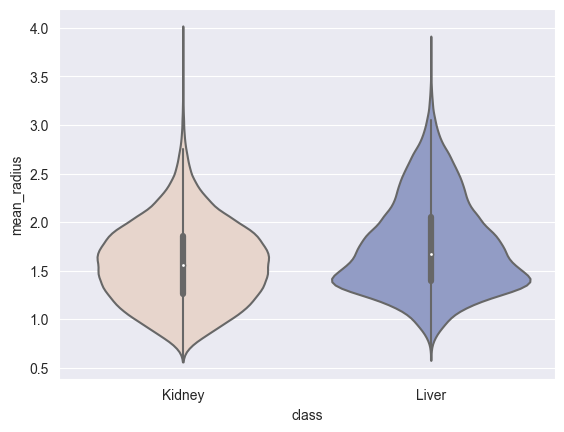

In [199]:
sns.violinplot(x="class", y=f"{cols_to_select[i]}", data=dat,palette=cmap,dodge=True,cut=0)
plt.xticks(range(len(titles)), titles)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
1 v.s. 2: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=1.913e+09


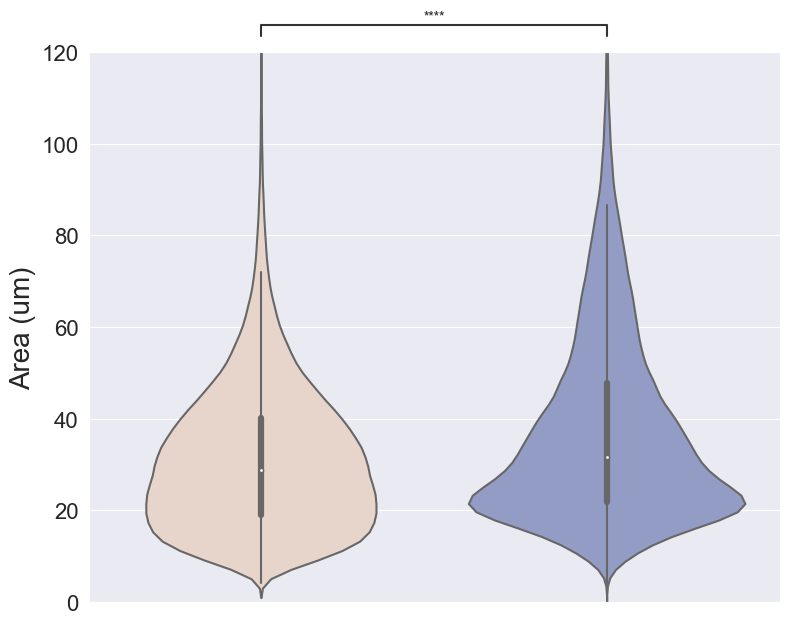

In [217]:
for i in range(len(cols_to_select)):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.violinplot(x="class", y=f"{cols_to_select[i]}", data=dat,palette=cmap, positions=range(len(titles)))
    plt.legend().remove()
    ax.set_xticklabels(titles)
    
    ax.set_xlabel('')
    ax.set_ylabel(f'{good_names[i]}', fontsize=20)
    #plt.xticks(range(len(titles)), titles,fontsize=20)
    plt.xticks(range(len(titles)), ['',''])
    plt.yticks(fontsize=16)
    #ax.set_ylim(0, 120)
    plt.tight_layout()
    
    temp = dat[[cols_to_select[i],'class']]
    kidney_col = temp[temp['class']==1][cols_to_select[i]]
    liver_col = temp[temp['class']==2][cols_to_select[i]]
    
    statannot.add_stat_annotation(
        ax,
        data=temp,
        x='class',
        y=cols_to_select[i],
        box_pairs=[(1, 2)],
        test="Wilcoxon",
        text_format="star",
        loc="outside",
        order=[1, 2],  # Ensure the order of the groups is correct
    )
    
    plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\liver_vs_kidney\{cols_to_select[i]}_plot.png', dpi=300)
    plt.show()
    #plt.close()  # Close the current figure to free up memory
    break

In [63]:
from sklearn.decomposition import PCA

In [69]:
def z_score_normalize(col):
    return (col - col.mean()) / col.std()

num_cols = x.shape[1]

# Normalize all columns except the last three
x2 = x.copy()

x2.iloc[:, :-3] = x.iloc[:, :-3].apply(z_score_normalize, axis=0)

In [70]:
df_sample2 = x2
pca2=PCA()
pca2.fit(x2)
pca2.explained_variance_ratio_

array([4.55543641e-01, 3.01145212e-01, 1.56452736e-01, 3.82674824e-02,
       2.17836295e-02, 1.16103147e-02, 6.72080378e-03, 3.79376848e-03,
       1.97790495e-03, 1.67946809e-03, 6.95884351e-04, 2.82320565e-04,
       4.06841971e-05, 6.15078700e-06, 2.55859174e-15])

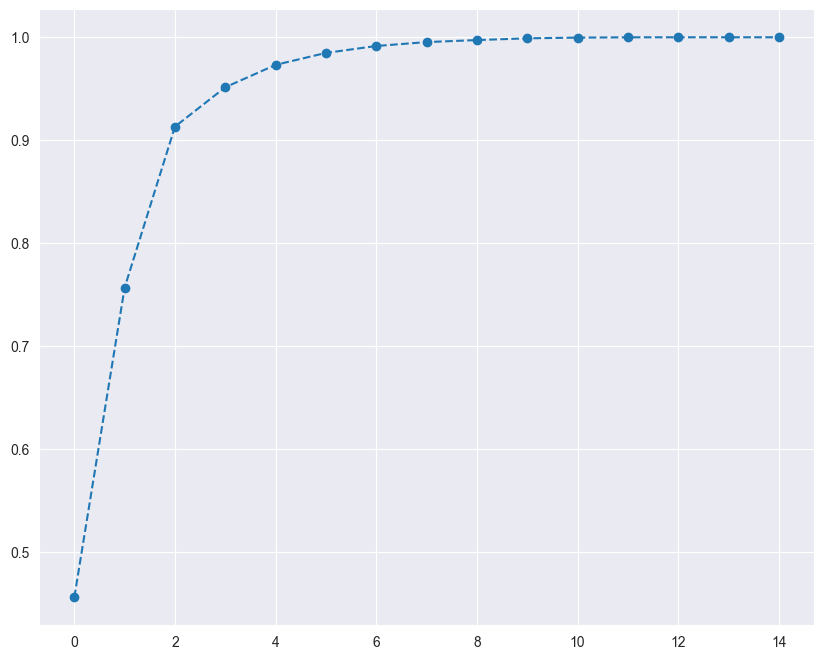

In [71]:
plt.figure(figsize=(10,8))
plt.plot(range(0,len(df_sample2.columns)), pca2.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

In [78]:
pca = PCA(n_components=3)
pca.fit(x2)
pca.transform(x2)
scores_pca = pca.transform(x2)

In [79]:
color_dict = dict(zip(np.unique(y), cmap))
colors = [color_dict[value] for value in y]

In [86]:
kidney_inds = [i for i, x in enumerate(y) if x == 1]
liver_inds = [i for i, x in enumerate(y) if x == 2]

In [87]:
print(len(kidney_inds))
print(kidney_inds[0:5])
print(len(liver_inds))
print(liver_inds[0:5])

100000
[0, 1, 2, 3, 4]
100000
[100000, 100001, 100002, 100003, 100004]


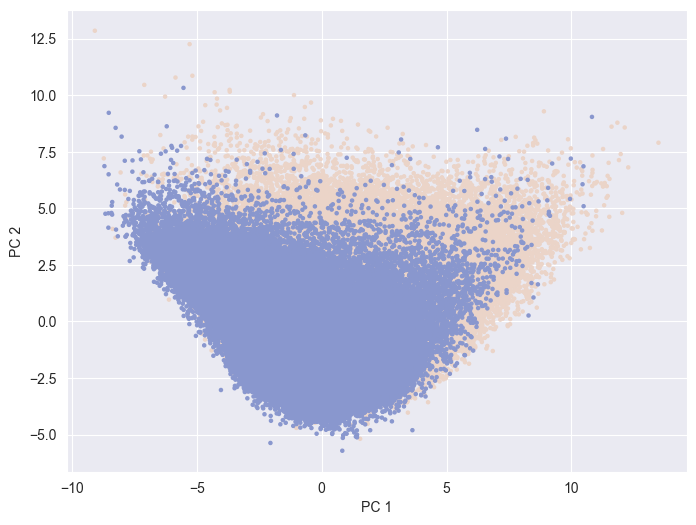

In [80]:
# Plot the transformed data (principal components)
plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], color=colors, label='Principal Components', s=5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pdfs\pca_plot.png', dpi=300)  # Save the plot as a PDF file
plt.show()

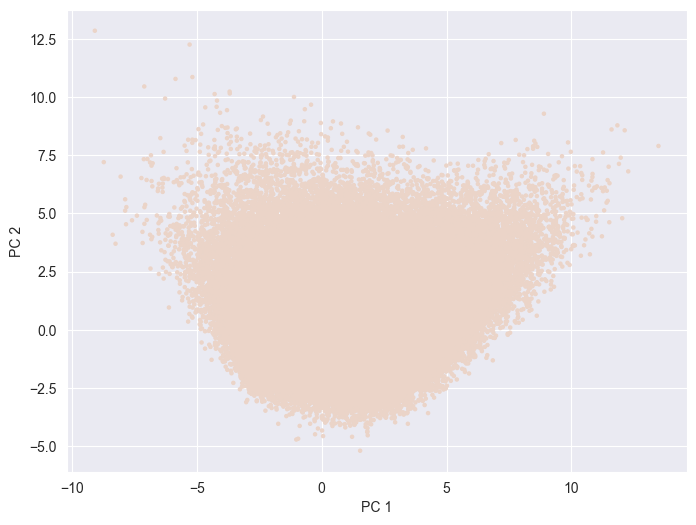

In [90]:
# Plot the transformed data (principal components)
plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[kidney_inds, 0], scores_pca[kidney_inds, 1], color=np.array(colors)[kidney_inds], label='Principal Components', s=5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pdfs\pca_plot.png', dpi=300)  # Save the plot as a PDF file
plt.show()

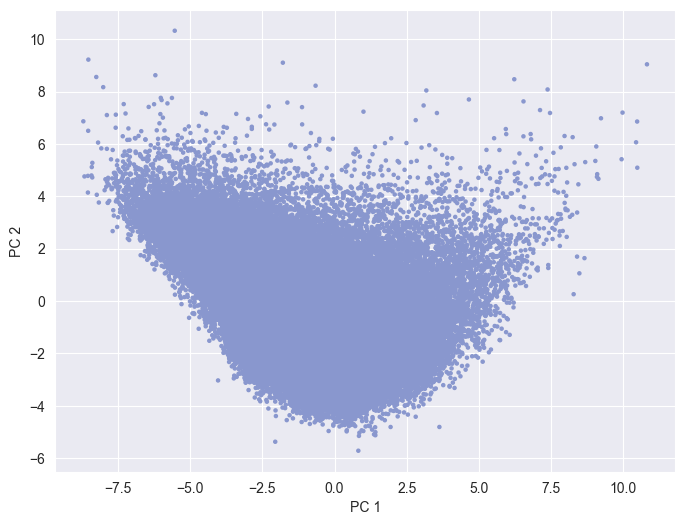

In [91]:
plt.show()
# Plot the transformed data (principal components)
plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[liver_inds, 0], scores_pca[liver_inds, 1], color=np.array(colors)[liver_inds],
            label='Principal Components', s=5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pdfs\pca_plot.png', dpi=300)  # Save the plot as a PDF file
plt.show()